# Introduction to Docking

## What is docking?

    1. Predict the orientation and conformation of a small molecule (ligand) in the binding site of the target protein 
    
    2. Estimate its binding affinity. 

## Application scenario of different docking methods

<img src='figure/model_comp.png' width=80%></img>
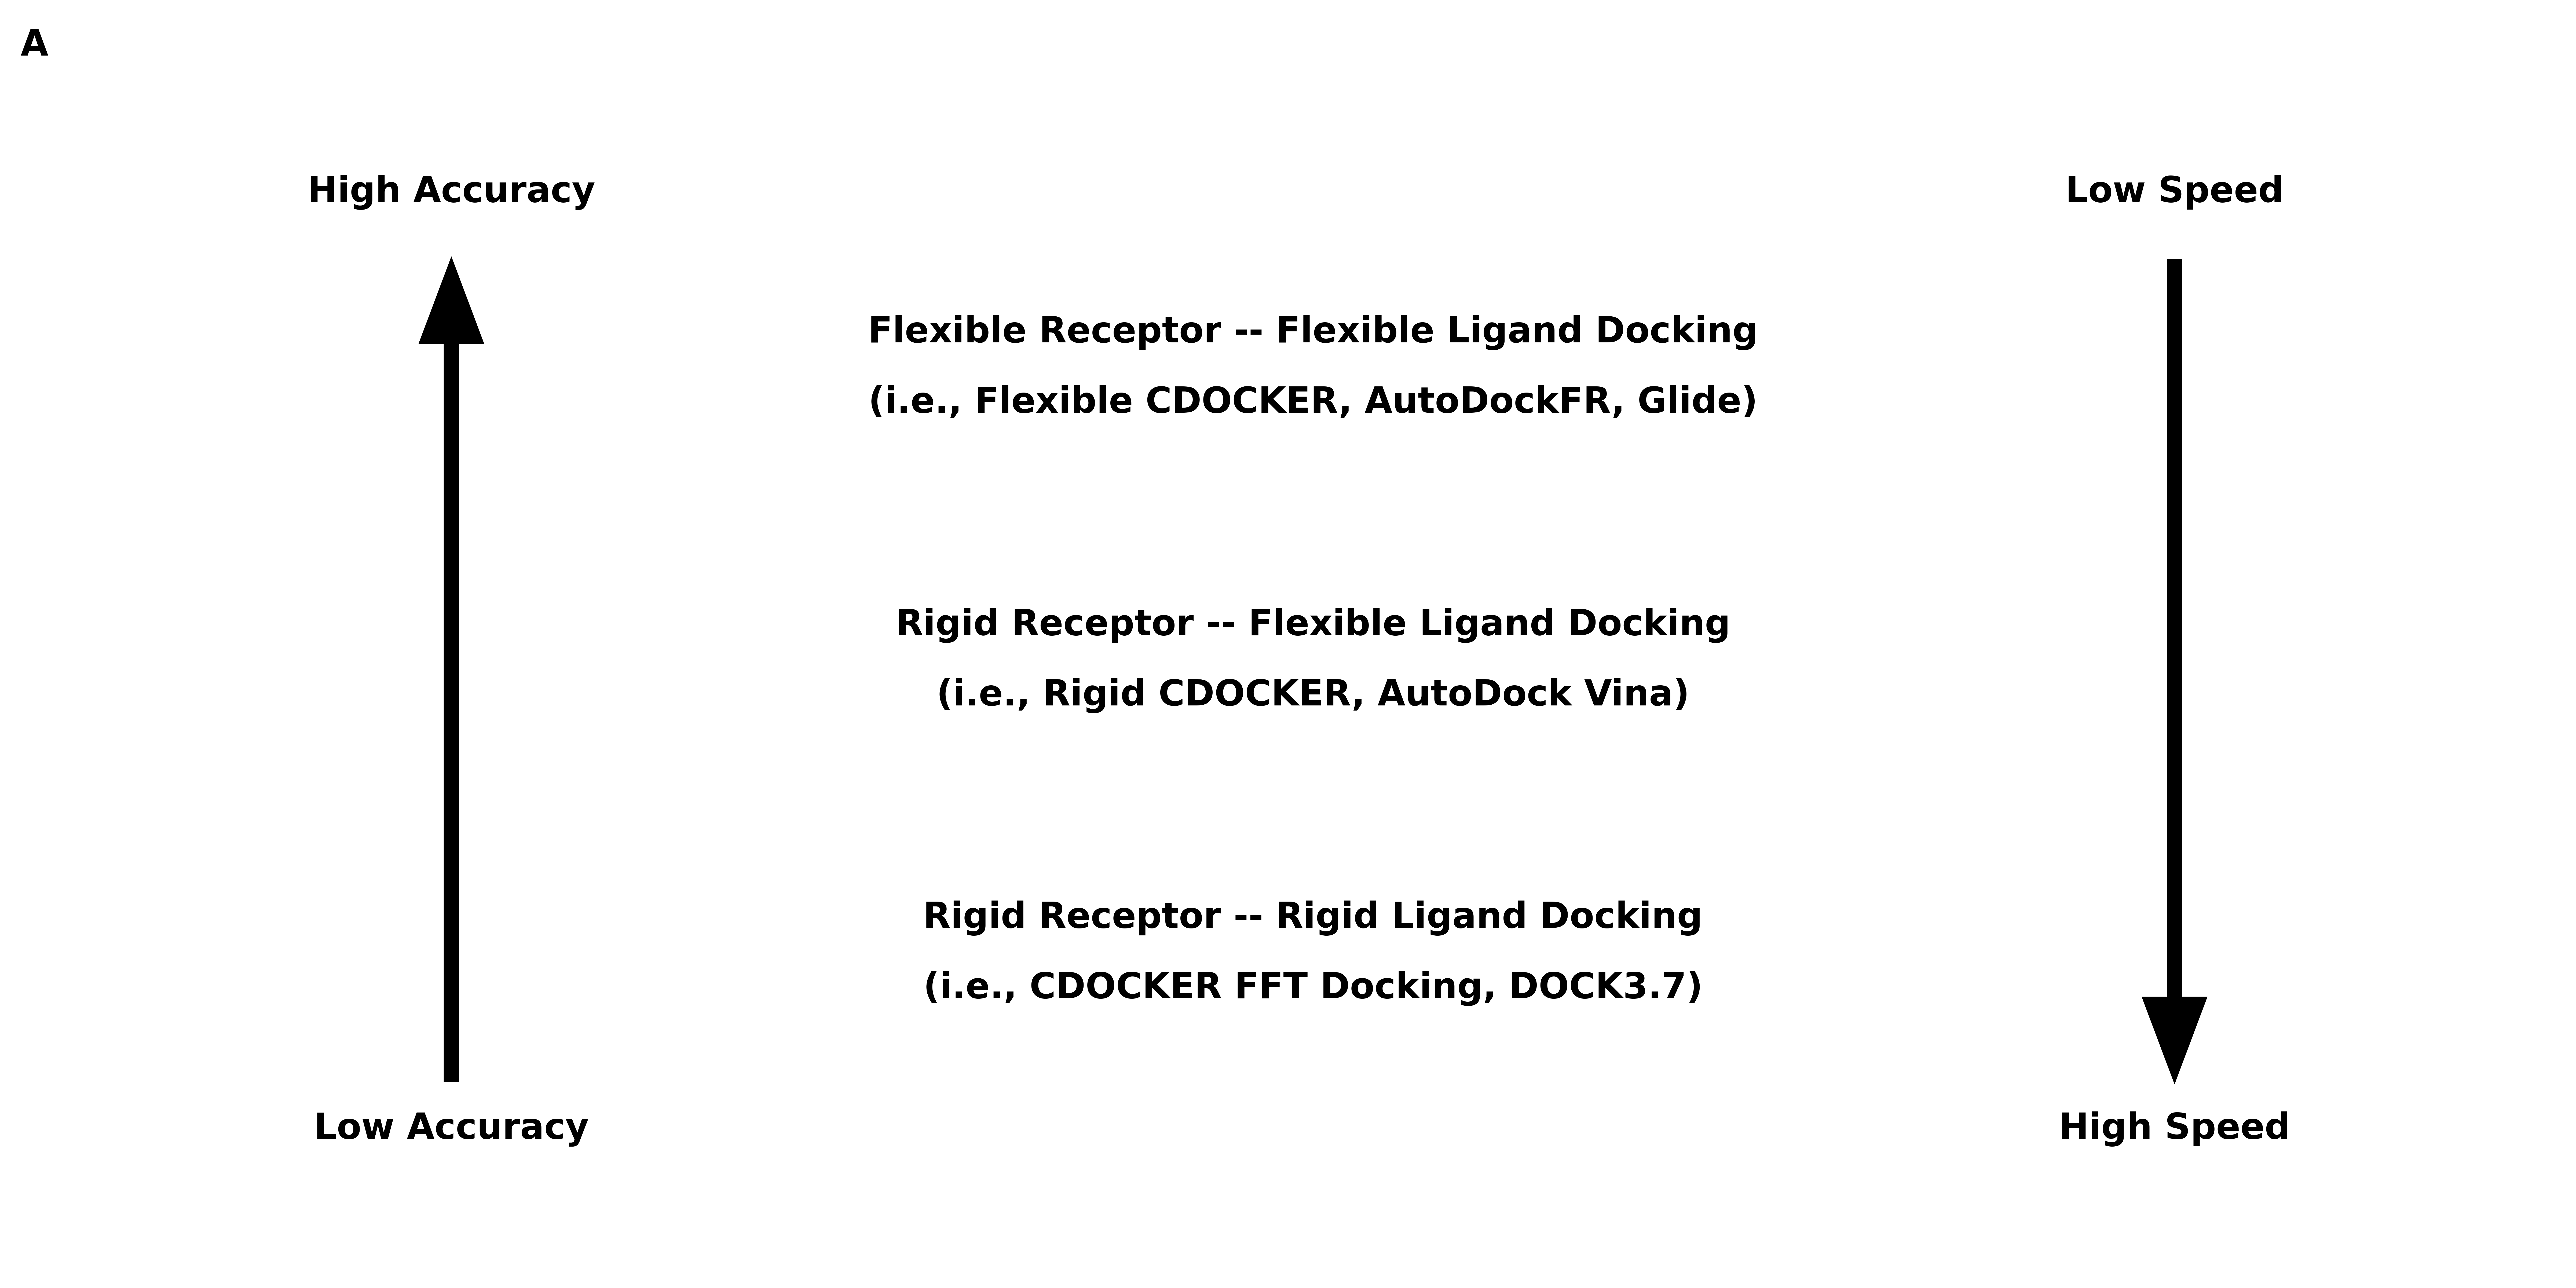

    1. In small-scale (i.e., dozens of) docking experiments, it is always a good idea to use sophisticated docking methods, such as Flexible CDOCKER
    
    2. However, in large-scale docking experiments, such as virtual screening for lead compound identification, direct application of such methods might not be appropriate or realistic because of its relative large computational cost. 
    
        1. This leads to the development of rigid receptor -- rigid ligand docking method (FFT docking).
        
        2. This also motivates us to development hierarchical docking methods. 

<img src="figure/hierarchical_model.png" width="65%"/></img>

# Introduction to CDOCKER

## CDOCKER is a CHARMM based docking algorithm

    1. Grid based docking method
    
    2. Used physics based scoring function

<img src="figure/cdocker.png" width="80%"/>

## Motivation for pyCHARMM CDOCKER

    1. Docking is a powerful computational tool and has been applied for various structure-based structure- function explorations. However, the scripting languages of these docking methods are relatively complicated for ones with little knowledge of docking. 
    
    2. On the other hand, to perform a successful docking experiment, one typically would need various cheminformatics tools either in preparation or post analyzing.

# General Set Up for pyCHARMM CDOCKER

Step 1. import essential python libraries

In [1]:
import pycharmm
import pycharmm.lib as lib
import pycharmm.read as read
import pycharmm.lingo as lingo
import pycharmm.settings as settings

Step 2. read in topology and parameter files

    1. In the following example, only protein and Cgenff topology and paramter files are read.
    2. If you want to dock against non-protein target, you should read in the corresponding topology and parameter files
    3. Alternatively, you could read in all topology and parameter files. Then you don't need to set bomblev. 

In [2]:
settings.set_bomb_level(-1)
read.rtf('"../Toppar/top_all36_prot.rtf"')
read.rtf('"../Toppar/top_all36_cgenff.rtf"', append = True)
read.prm('"../Toppar/par_all36m_prot.prm"', flex = True)
read.prm('"../Toppar/par_all36_cgenff.prm"', append = True, flex = True)
settings.set_bomb_level(0)
lingo.charmm_script('stream "../rigid/ligandrtf"')

  
 CHARMM>     read rtf card -
 CHARMM>     name "../Toppar/top_all36_prot.rtf"
 VOPEN> Attempting to open::../Toppar/top_all36_prot.rtf::
 MAINIO> Residue topology file being read from unit  91.
 TITLE> *>>>>>>>>CHARMM36 ALL-HYDROGEN TOPOLOGY FILE FOR PROTEINS <<<<<<
 TITLE> *>>>>> INCLUDES PHI, PSI CROSS TERM MAP (CMAP) CORRECTION <<<<<<<
 TITLE> *>>>>>>>>>>>>>>>>>>>>>>>>>> MAY 2011 <<<<<<<<<<<<<<<<<<<<<<<<<<<<
 TITLE> * ALL COMMENTS TO THE CHARMM WEB SITE: WWW.CHARMM.ORG
 TITLE> *             PARAMETER SET DISCUSSION FORUM
 TITLE> *
 VCLOSE: Closing unit   91 with status "KEEP"
  
 CHARMM>     
  
  
 CHARMM>     read rtf card -
 CHARMM>     name "../Toppar/top_all36_cgenff.rtf" -
 CHARMM>     append
 VOPEN> Attempting to open::../Toppar/top_all36_cgenff.rtf::
 MAINIO> Residue topology file being read from unit  91.
 TITLE> *  --------------------------------------------------------------------------  *
 TITLE> *          CGENFF: TOPOLOGY FOR THE CHARMM GENERAL FORCE FIELD V. 4.3  

1

Step 3. define grid box information

    1. grid box center (xyz-coordinates): xcen, ycen, zcen
    2. size of grid box: maxlen

Step 4. general parameters for the pyCHARMM CDOCKER

# pyCHARMM Rigid CDOCKER

## Helper function

In [3]:
from pycharmm.cdocker import Rigid_CDOCKER
help(Rigid_CDOCKER)

Help on function Rigid_CDOCKER in module pycharmm.cdocker:

Rigid_CDOCKER(xcen=0, ycen=0, zcen=0, maxlen=10, dielec=3, rcta=0, rctb=0, hmax=0, flag_grid=False, flag_rdie=True, flag_form=False, flag_delete_grid=True, probeFile='"../Toppar/fftdock_c36prot_cgenff_probes.txt"', softGridFile='grid-emax-0.6-mine--0.4-maxe-0.4.bin', hardGridFile='grid-emax-3-mine--30-maxe-30.bin', nativeGridFile='grid-emax-100-mine--100-maxe-100.bin', receptorPDB='./protein.pdb', receptorPSF='./protein.psf', ligPDB='./ligand.pdb', ligSeg='LIGA', confDir='./conformer/', placementDir='./placement/', exhaustiveness='high', numPlace=100, numCopy=1000, flag_delete_conformer=True, flag_delete_placement=True, flag_save_all=True, flag_save_cluster=True, flag_save_top=True, flag_suppress_print=True, flag_center_ligand=True, flag_fast_grid=False, flag_use_hbond=False, flag_fast_placement=True, threshold=2500, sort_energy='total_energy', saveDir='./dockresult/')
    Rigid CDOCKER standard docking method 
    
    Parame

## pyCHARMM Rigid CDOCKER Docking and Analysis

### Running Rigid CDOCKER with Default Input

1. ligand file: <font color='red'>ligand.pdb</font>
2. ligand segment ID: <font color='red'>LIGA</font>
3. receptor file : <font color='red'>protein.pdb</font> and <font color='red'>protein.psf</font>
4. For docking with Rigid CDOCKER, the user need to provide a pre-computed ligand conformer library. Default folder name: <font color='red'>conformer/</font>
5. Default docking trials: <font color='red'>100</font> docking trials per conformer

<img src="figure/SB2012.png" width="65%"/>

With default input, the user only need to provide <font color='red'>grid box information</font> (see example below).

```Rigid_CDOCKER(xcen = 1, ycen = 1, zcen = 1, maxlen = 10)```

### pyCHARMM Rigid CDOCKER Example

We have shown some basic requirments for Rigid CDOCKER. Below is a practical example of perform pyCHARMM Rigid CDOCKER docking experiments.
    
***Note***
1. In this example, we specified the <font color='red'>file location</font> of the ligand and receptor (i.e., they are not at their default location).
2. We also change the number of docking trials per conformer to <font color='red'>20</font> to reduce the computational cost. 

In [1]:
## Copy grid files
!cp grid/rigid/* ./

In [2]:
## Import module
import pycharmm
import pycharmm.lib as lib
import pycharmm.read as read
import pycharmm.lingo as lingo
import pycharmm.settings as settings
from pycharmm.cdocker import Rigid_CDOCKER

## File name and pathway
ligPDB = "../rigid/ligand.pdb"
ligandrtf = "../rigid/ligandrtf"
confDir = "../rigid/conformer/"
receptorPDB = "../rigid/protein.pdb"
receptorPSF = "../rigid/protein.psf"

## Topology and parameter files
settings.set_bomb_level(-1)
read.rtf('"../Toppar/top_all36_prot.rtf"')
read.rtf('"../Toppar/top_all36_cgenff.rtf"', append = True)
read.prm('"../Toppar/par_all36m_prot.prm"', flex = True)
read.prm('"../Toppar/par_all36_cgenff.prm"', append = True, flex = True)
settings.set_bomb_level(0)
lingo.charmm_script('stream ' + ligandrtf)

## Rigid CDOCKER standard docking protocol
clusterResult, dockResult = Rigid_CDOCKER(xcen = 12.33, ycen = 33.48, zcen = 19.70,
                                        maxlen = 25.762, ligPDB = ligPDB, receptorPDB = receptorPDB,
                                        receptorPSF = receptorPSF, confDir = confDir, flag_grid = True,
                                        flag_delete_conformer = False, numPlace = 5)

print(clusterResult)
print(dockResult)
exit()


  
 CHARMM>     read rtf card -
 CHARMM>     name "../Toppar/top_all36_prot.rtf"
 VOPEN> Attempting to open::../Toppar/top_all36_prot.rtf::
 MAINIO> Residue topology file being read from unit  91.
 TITLE> *>>>>>>>>CHARMM36 ALL-HYDROGEN TOPOLOGY FILE FOR PROTEINS <<<<<<
 TITLE> *>>>>> INCLUDES PHI, PSI CROSS TERM MAP (CMAP) CORRECTION <<<<<<<
 TITLE> *>>>>>>>>>>>>>>>>>>>>>>>>>> MAY 2011 <<<<<<<<<<<<<<<<<<<<<<<<<<<<
 TITLE> * ALL COMMENTS TO THE CHARMM WEB SITE: WWW.CHARMM.ORG
 TITLE> *             PARAMETER SET DISCUSSION FORUM
 TITLE> *
 VCLOSE: Closing unit   91 with status "KEEP"
  
 CHARMM>     
  
  
 CHARMM>     read rtf card -
 CHARMM>     name "../Toppar/top_all36_cgenff.rtf" -
 CHARMM>     append
 VOPEN> Attempting to open::../Toppar/top_all36_cgenff.rtf::
 MAINIO> Residue topology file being read from unit  91.
 TITLE> *  --------------------------------------------------------------------------  *
 TITLE> *          CGENFF: TOPOLOGY FOR THE CHARMM GENERAL FORCE FIELD V. 4.3  

/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.5 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.6 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.7 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.4 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.5 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.6 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.7 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.4 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.5 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.5 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.6 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.7 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.4 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.5 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.6 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.7 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.4 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.5 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.6 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.7 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.4 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.5 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.6 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.7 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.7 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.4 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.5 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member


/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.6 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.7 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.8 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 0.9 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.0 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.1 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.2 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.3 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1.4 -iterate -maxerr 0.01 -mode rmsd -heavy
/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -r

Cluster only have one cluster member

 Message from MAPIC: Atom numbers are changed.

 Message from MAPIC:          1 residues deleted.

 Message from MAPIC:          1 segments deleted.
 DELTIC:        48 bonds deleted
 DELTIC:        85 angles deleted
 DELTIC:       120 dihedrals deleted
 DELTIC:         3 improper dihedrals deleted
 DELTIC:         3 acceptors deleted
  
 CHARMM>     read psf card -
 CHARMM>     name ../rigid/protein.psf -
 CHARMM>     append
 VOPEN> Attempting to open::../RIGID/PROTEIN.PSF::
 MAINIO> Protein structure file being appended from unit  91.
 psf_read_formatted: Reading PSF in the expanded format.
 TITLE>  * BUILD PROTEIN PSF AND PDB FILE
 TITLE>  *  DATE:    11/15/21     13:21: 4      CREATED BY USER: yujin
 TITLE>  *
 PSFSUM> PSF modified: NONBOND lists and IMAGE atoms cleared.
 PSFSUM> Summary of the structure file counters :
         Number of segments      =        1   Number of residues   =      166
         Number of atoms         =     2619   Num

### pyCHARMM Rigid CDOCKER Default Output

By default, pyCHARMM Rigid CDOCKER will create a folder (<font color='red'>dockresult</font>) and save all the outputs to this folder.

TSV files
1. <font color='red'>clusterResult.tsv</font> contains docking result for the clustered poses.
2. <font color='red'>explicitCluster.tsv</font> contains docking result for the clustered poses after explicit all atom minimization. 
3. <font color='red'>dockResult.tsv</font> contains docking result for all docked poses. 
4. <font color='red'>explicitTop10.tsv</font> contains docking result for the top 10 poses after explicit all atom minimization. 

Folders:
1. Folder <font color='red'>allPose/</font> contains all docked poses.
2. Folder <font color='red'>cluster/</font> contains all clustered poses.
3. Folder <font color='red'>top_ener/</font> contains the top 10 poses.


In [1]:
!ls dockresult

allPose             clusterResult.tsv   explicitCluster.tsv top_ener
cluster             dockResult.tsv      explicitTop10.tsv


In [2]:
!ls dockresult/allPose dockresult/cluster dockresult/top_ener

dockresult/allPose:
10_1.pdb 11_3.pdb 1_5.pdb  3_2.pdb  4_4.pdb  6_1.pdb  7_3.pdb  8_5.pdb
10_2.pdb 11_4.pdb 2_1.pdb  3_3.pdb  4_5.pdb  6_2.pdb  7_4.pdb  9_1.pdb
10_3.pdb 11_5.pdb 2_2.pdb  3_4.pdb  5_1.pdb  6_3.pdb  7_5.pdb  9_2.pdb
10_4.pdb 1_1.pdb  2_3.pdb  3_5.pdb  5_2.pdb  6_4.pdb  8_1.pdb  9_3.pdb
10_5.pdb 1_2.pdb  2_4.pdb  4_1.pdb  5_3.pdb  6_5.pdb  8_2.pdb  9_4.pdb
11_1.pdb 1_3.pdb  2_5.pdb  4_2.pdb  5_4.pdb  7_1.pdb  8_3.pdb  9_5.pdb
11_2.pdb 1_4.pdb  3_1.pdb  4_3.pdb  5_5.pdb  7_2.pdb  8_4.pdb

dockresult/cluster:
top_1.pdb  top_11.pdb top_3.pdb  top_5.pdb  top_7.pdb  top_9.pdb
top_10.pdb top_2.pdb  top_4.pdb  top_6.pdb  top_8.pdb

dockresult/top_ener:
top_1.pdb  top_2.pdb  top_4.pdb  top_6.pdb  top_8.pdb
top_10.pdb top_3.pdb  top_5.pdb  top_7.pdb  top_9.pdb


1. In the folder <font color='red'>allPose/</font>, the nomenclature of the pdb files is \{conformer_id\}_\{placement_id\}
2. In the folder <font color='red'>cluster/</font> and <font color='red'>top_ener</font>, the docked poses are sorted (i.e., top_1.pdb to top_n.pdb). The sorting method will be discussed later.

#### Lets look at the docked pose first

In [3]:
# if you can run pymol in your setup issue the command above in the terminal and set the usepymol logical
# here:
usepymol = True
if usepymol:
    import xmlrpc.client as xmlrpclib
    cmd = xmlrpclib.ServerProxy('http://localhost:9123')
    cmd.reinitialize()
# Otherwise set usepymol to False and proceed.

ConnectionRefusedError: [Errno 61] Connection refused

ssh -N -f -R 9123:localhost:9123 satyr

In [6]:
# This import enables pymol command interpreter to be used
if usepymol:
    # We can use this command interface to alter the view/representation and selection
    cmd.delete('all')
    cmd.load('../rigid/ligand.pdb')
    cmd.load('../rigid/protein.pdb')
    cmd.load('dockresult/cluster/top_1.pdb')
    cmd.load('dockresult/top_ener/top_1.pdb')
    cmd.orient('top_1')

#### Now lets look at these tsv files. 

In [4]:
import pandas as pd

1. dockResult.tsv will always be created. It contains the docking results for all docked poses and is sorted by <font color='red'>total energy</font>. 

In [5]:
print(pd.read_csv("dockresult/dockResult.tsv", sep ='\t').drop("Unnamed: 0", axis = 1))

    total_energy   grid_total     grid_vdw   grid_elec   grid_hbond  \
0    -112.094693   -97.474573   -47.387884  -25.645049   -24.441639   
1     -98.606990   -90.102519   -44.309781  -20.822509   -24.970230   
2     -98.233093   -91.441870   -47.779443  -30.026854   -13.635573   
3     -91.680458   -92.221569   -41.655357  -27.352038   -23.214175   
4     -86.336756   -71.576807   -32.167126  -19.258505   -20.151175   
5     -73.525701   -64.638356   -40.830724  -11.465095   -12.342537   
6     -71.970798   -73.992728   -39.170915  -24.317865   -10.503948   
7     -60.557424   -72.302611   -25.367232  -29.325176   -17.610203   
8     -49.705708   -54.607874   -29.712599  -28.542609     3.647334   
9     -47.577195   -42.217334   -25.218949   -9.982050    -7.016334   
10    -45.845554   -46.555789   -17.687890  -23.732519    -5.135380   
11    -42.309308   -67.763952   -23.391277  -34.154640   -10.218034   
12    -28.566734   -43.990794    -1.407919  -22.074865   -20.508011   
13    

2. clusterResult.tsv will always be created. It contains the docking results for the clustered poses and is sorted by <font color='red'>total energy</font>

In [6]:
print(pd.read_csv("dockresult/clusterResult.tsv", sep = '\t').drop("Unnamed: 0", axis = 1))

    total_energy   grid_total     grid_vdw   grid_elec   grid_hbond  \
0     -86.336756   -71.576807   -32.167126  -19.258505   -20.151175   
1     -20.381592   -51.986975   -19.033662  -21.418404   -11.534909   
2     272.611876     6.493893    -0.456328  -31.378726    38.328947   
3     303.888317   230.181667   324.520365  -90.521159    -3.817538   
4    2311.884029  2068.013628  1105.180473 -139.494644  1102.327799   
5    2391.960632  1972.385062   866.195536 -132.458552  1238.648079   
6    2582.974569  2430.228038  1235.551628  -68.799973  1263.476383   
7    2747.733474  2404.270288  1549.513112 -209.199095  1063.956271   
8    2830.323801  2632.783169  1694.650643 -131.843370  1069.975895   
9    2859.920009  2612.425016  1667.710727 -695.451842  1640.166131   
10   3051.186264  2799.097016  1886.315937 -117.168076  1029.949155   

    conformer_id  placement_id  PDB_name  cluster_size  
0              1             5   1_5.pdb             1  
1              7             5   

3. By default, cluster representatives and top 10 poses will be rescored with explicit receptor atoms.
The user can decide how they want to sort these two dataframes with the parameter <font color='red'>sort_energy</font>.
The default sorting is based on total energy. 


In [7]:
explicitTop10 = pd.read_csv("dockresult/explicitTop10.tsv", sep = '\t').drop("Unnamed: 0", axis = 1)
explicitCluster = pd.read_csv("dockresult/explicitCluster.tsv", sep = '\t').drop("Unnamed: 0", axis = 1)
print("Top 10 lowest energy poses with explicit all atom minimization. \n \n", explicitTop10, "\n \n")
print("Cluster poses with explicit all atom minimization. \n \n", explicitCluster)

Top 10 lowest energy poses with explicit all atom minimization. 
 
     total_energy        vdw        elec  grid_hbond  conformer_id  \
0    -152.451856 -42.239211 -142.010828  -24.441639             4   
1    -142.698436 -39.794059 -135.866456  -24.970230             9   
2    -142.016373 -45.035283 -142.212811  -13.635573             5   
3    -134.425309 -34.969692 -134.984411  -23.214175            11   
4    -130.756108 -21.193459 -149.769007  -20.151175             1   
5    -125.294427 -37.473049 -130.164068  -17.610203            11   
6    -118.526467 -33.150330 -133.092137   -5.135380             1   
7    -118.150176 -41.072817 -124.278673  -10.503948             6   
8    -109.222297 -31.188874 -120.038916  -12.342537             3   
9    -106.929542 -41.322433 -129.904523    3.647334             8   
10    -92.442927 -28.585781 -114.769627   -7.016334            10   

    placement_id  PDB_name  
0              2   4_2.pdb  
1              2   9_2.pdb  
2              2

## pyCHARMM Rigid CDOCKER Parameter for Controlling Input Information. 

1. Parameters that require user input

| Parameters | Default value | Meaning|
| :-- | :-- | :-- |
| xcen | 0 | x coordinate of the center of the grid box | 
| ycen | 0 | y coordinate of the center of the grid box | 
| zcen | 0 | z coordinate of the center of the grid box | 
| maxlen | 10 | size of the grid box | 

2. Parameters that are miscellaneous. 

| Parameters | Default value | Meaning|
| :-- | :-- | :-- |
| ligPDB | 'ligand.pdb' | ligand PDB file | 
| ligSeg | 'LIGA' | Segment ID in the ligand PDB file | 
| receptorPDB | 'protein.pdb' | receptor PDB file | 
| receptorPSF | 'protein.psf' | receptor PSF file | 
| numPlace | 100 | number of placement per conformer | 
| sort_energy | 'total_energy' | sorting method of the explicit all atom minimization result |
| saveDir | './dockresult/' | folder name of the final result directory |
| confDir | './conformer/' | folder name of the conformer library |
| flag_center_ligand | Ture | whether or not center the ligand in the binding pocket | 
| flag_grid | False | whether or not grid need to be generated before docking |
| flag_delete_grid | True | whether or not delete grid after docking |
| flag_delete_conformer | True | whether or not delete conformer after docking |
| flag_delete_placement | True | whether or not delete ligand initial placement after docking| 
| flag_save_all | Ture | whether or not save all docked pose after docking |
| flag_save_cluster | True | whether or not save clustered results after docking |
| flag_save_top | Ture | whether or not save top 10 ranking poses after docking |

3. Parameters that are not recommended to be changed and the default values are applicable for most use cases.

| Parameters | Default value | Meaning|
| :-- | :-- | :-- |
| dielec | 3.0 | dielectric constant | 
| flag_rdie | True | True for rdie, False for cdie | 
| flag_form | False | whether or not grid form is formatted | 
| probeFile | "../Toppar/fftdock_c36prot_cgenff_probes.txt" | probe file for gpu grid generation| 
| softGridFile | 'grid-emax-0.6-mine--0.4-maxe-0.4.bin' | soft grid file name |
| hardGridFile | 'grid-emax-3-mine--30-maxe-30.bin' | hard grid file name |
| nativeGridFile | 'grid-emax-100-mine--100-maxe-100.bin' | native grid file name |
| placementDir | './placement/' | ligand placement folder name |
| flag_fast_placement | True | True for using fast placement, False for using original Rigid CDOCKER placement method |
| exhaustiveness | 'high' | exhaustiveness for fast placement, high, medium, low |
| threshold | 2500 | cutoff threshold for original Rigid CDOCKER placement method |
| numCopy | 1000 | maximum number of copy for OpenMM parallel simulated annealing |
| flag_suppress_print | True | whether or not suppress warning message during docking |
| flag_fast_grid | False | True for using grid minimization, False for explicit atom minimization |

## pyCHARMM Rigid CDOCKER Covalent Docking

The major difference between the covalent docking and non-covalent docking in the pyCHARMM Rigid CDOCKER is that the user needs to <font color=red>specify the well-depth and cutoffs</font> of the covalent bond grid potential. Below shows the customizable covalent (hydrogen bond) grid potential.

***Note***
1. User need to specifiy the sets of ligand and receptor atoms that are interested. 
2. The corresponding parameter files need to be updated
3. CHARMM selection script : 
       1. acceptor set select *** end
       2. donor set select *** end

<img src="figure/ener.png" width="80%"/>

And the corrsponding parameters in the Rigid_CDOCKER are :

| Parameters | Default value | Meaning|
| :-- | :-- | :-- |
| rcta | 0 | customizable grid left cutoff | 
| rctb | 0 | customizable grid right cutoff |
| hmax | 0 | customizable grid well-depth |
| flag_use_hbond | False | whether or not use hydrogen/covalent bond grid potential in Rigid CDOCKER | 

# pyCHARMM Flexible CDOCKER

## Helper function

In [8]:
from pycharmm.cdocker import Flexible_CDOCKER
help(Flexible_CDOCKER)

Help on function Flexible_CDOCKER in module pycharmm.cdocker:

Flexible_CDOCKER(xcen=0, ycen=0, zcen=0, maxlen=10, num=20, copy=25, generation=2, threshold_init=2500, threshold_mutate=100, flag_grid=False, flag_form=False, flag_delete_grid=True, probeFile='"../Toppar/fftdock_c36prot_cgenff_probes.txt"', softGridFile='grid-emax-0.6-mine--0.4-maxe-0.4.bin', hardGridFile='grid-emax-3-mine--30-maxe-30.bin', nativeGridFile='grid-emax-100-mine--100-maxe-100.bin', dihedralFile='../Toppar/protein_dihedral.csv', receptorPDB='./protein.pdb', receptorPSF='./protein.psf', receptorCard='"./flexchain.crd"', saveLig='./ligand/', saveProt='./protein/', crossoverLig='./crossover_ligand/', crossoverProt='./crossover_protein/', saveLigFinal='./ligand_final/', saveProtFinal='./protein_final/', ligPDB='./ligand.pdb', ligSeg='LIGA', flexchain=None, placementDir='./placement/', flag_save_all=False, flag_save_cluster=True, flag_save_placement=False, flag_save_crossover=False, flag_suppress_print=True, flag_ce

## pyCHARMM Flexible CDOCKER Docking and Analysis

### Running Flexible CDOCKER with Default Input

1. ligand file: <font color='red'>ligand.pdb</font>
2. ligand segment ID: <font color='red'>LIGA</font>
3. receptor file : <font color='red'>protein.pdb</font> and <font color='red'>protein.psf</font>
4. Default docking trials: <font color='red'>20</font> conformers generated by Open Babel and <font color='red'>25</font> copies each conformer. (i.e., Open Babel is essential for Flexible CDOCKER)

With default input, the user only needs to provide <font color='red'>grid box information</font> and <font color='red'>flexible amino acid side chain selection</font>(see example below).

***Note***
1. Currently, pyCHARMM Flexible CDOCKER only works with protein receptor.
2. The flexible side chain selection needs to be a pandas dataframe. 

In [9]:
import pandas as pd
flexchain = pd.read_csv('../flex/flexchain.csv', sep = '\t', index_col = 0)
print(flexchain)

   res_id seg_id
0      84   PROT
1      87   PROT
2      99   PROT
3     111   PROT
4     118   PROT


With default input, the user only need to provide <font color='red'>grid box information</font> and <font color='red'>flexible side chain selection</font> (see example below).

```Flexible_CDOCKER(xcen = 1, ycen = 1, zcen = 1, maxlen = 10, flexchain = flexchain)```

### pyCHARMM Flexible CDOCKER Example

We have shown some basic requirments for Flexible CDOCKER. Below is a practical example of perform pyCHARMM Flexible CDOCKER docking experiments.
    
***Note***
1. In this example, we specified the <font color='red'>file location</font> of the ligand, receptor and flexible side chain selection (i.e., they are not at their default location).
2. We also change the number of conformers to <font color='red'>5</font> and the number of docking trials per conformer to <font color='red'>5</font> to reduce the computational cost. 

In [10]:
## Copy grid files
!cp grid/flex/* ./

In [11]:
## Import module
import pandas as pd
import pycharmm
import pycharmm.lib as lib
import pycharmm.read as read
import pycharmm.lingo as lingo
import pycharmm.settings as settings
from pycharmm.cdocker import Flexible_CDOCKER

## File name and pathway
ligPDB = "../flex/ligand.pdb"
ligandrtf = "../flex/ligandrtf"
receptorPDB = "../flex/protein.pdb"
receptorPSF = "../flex/protein.psf"
topdir = "../Toppar/"

## Topology and parameter files
settings.set_bomb_level(-1)
read.rtf('"../Toppar/top_all36_prot.rtf"')
read.rtf('"../Toppar/top_all36_cgenff.rtf"', append = True)
read.prm('"../Toppar/par_all36m_prot.prm"', flex = True)
read.prm('"../Toppar/par_all36_cgenff.prm"', append = True, flex = True)
settings.set_bomb_level(0)
lingo.charmm_script('stream ' + ligandrtf)

## Read in the receptor flexible side chain selection
flexchain = pd.read_csv('../flex/flexchain.csv', sep = '\t', index_col = 0)

## Flexible CDOCKER standard docking protocol
clusterResult, dockResult = Flexible_CDOCKER(xcen = 26.911, ycen = 6.126, zcen = 4.178,
                            maxlen = 14.492, ligPDB = ligPDB, receptorPDB = receptorPDB,
                            receptorPSF = receptorPSF, num = 5, copy = 5,
                            flag_grid = True, flexchain = flexchain)

print(clusterResult)
print(dockResult)
exit()

  
 CHARMM>     read rtf card -
 CHARMM>     name "../Toppar/top_all36_prot.rtf"
 VOPEN> Attempting to open::../Toppar/top_all36_prot.rtf::
 MAINIO> Residue topology file being read from unit  91.
 TITLE> *>>>>>>>>CHARMM36 ALL-HYDROGEN TOPOLOGY FILE FOR PROTEINS <<<<<<
 TITLE> *>>>>> INCLUDES PHI, PSI CROSS TERM MAP (CMAP) CORRECTION <<<<<<<
 TITLE> *>>>>>>>>>>>>>>>>>>>>>>>>>> MAY 2011 <<<<<<<<<<<<<<<<<<<<<<<<<<<<
 TITLE> * ALL COMMENTS TO THE CHARMM WEB SITE: WWW.CHARMM.ORG
 TITLE> *             PARAMETER SET DISCUSSION FORUM
 TITLE> *
 VCLOSE: Closing unit   91 with status "KEEP"
  
 CHARMM>     
  
  
 CHARMM>     read rtf card -
 CHARMM>     name "../Toppar/top_all36_cgenff.rtf" -
 CHARMM>     append
 VOPEN> Attempting to open::../Toppar/top_all36_cgenff.rtf::
 MAINIO> Residue topology file being read from unit  91.
 TITLE> *  --------------------------------------------------------------------------  *
 TITLE> *          CGENFF: TOPOLOGY FOR THE CHARMM GENERAL FORCE FIELD V. 4.3  

*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

Grid is applied to specified atoms
Flexible receptor + ligand placement  2
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  3
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  4
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  5
A selection has been stored as NHCVDBQIMMZGWLLTZNMD
Grid is applied to specified atoms


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

Grid is applied to specified atoms
Flexible receptor + ligand placement  6
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  7
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  8
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  9
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  10


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

A selection has been stored as FMZNUPPVOEIPJJQKOBIX
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  11
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  12
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  13
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  14
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  15


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

A selection has been stored as PAWCMKEYAIIUWEXWZQMS
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  16
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  17
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  18
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  19
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  20


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

A selection has been stored as RJICKHPHPXBTFIRNCLIC
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  21
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  22
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  23
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  24
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  25
Set OMMD ligand copy 1
Set OMMD ligand copy 2
Set OMMD ligand copy 3
Set OMMD ligand copy 4
Set OMMD ligand copy 5
Set OMMD ligand copy 6
Set OMMD ligand copy 7
Set OMMD ligand copy 8
Set OMMD ligand copy 9
Set OMMD ligand copy 10
Set OMMD ligand copy 11
Set OMMD ligand copy 12
Set OMMD ligand copy 13
Set OMMD ligand copy 14
Set OMMD ligand copy 15
Set OMMD ligand copy 16
Set OMMD ligand co

/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1 -iterate -maxerr 0.01 -mode rmsd -heavy


Flexible receptor + ligand placement  1
Flexible receptor + ligand placement  2
Flexible receptor + ligand placement  3
Flexible receptor + ligand placement  4
Flexible receptor + ligand placement  5
Flexible receptor + ligand placement  6
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  7
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  8
Flexible receptor + ligand placement  9
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  10
Flexible receptor + ligand placement  11
Flexible receptor + ligand placement  12
Flexible receptor + ligand placement  13
Flexible receptor + ligand placement  14
Flexible receptor + ligand placement  15
Grid is applied to specified atoms
Grid is applied to specified atoms
Flexible receptor + ligand placement  16
Flexible receptor + ligand placement  17
Flexible receptor + ligand place

/Applications/MMTSB/bin/kclust -pdb -centroid -cdist -radius 1 -iterate -maxerr 0.01 -mode rmsd -heavy


Calculate conformational entropy contribution from amino acid  VAL
Calculate conformational entropy contribution from amino acid  VAL
Calculate conformational entropy contribution from amino acid  LEU

 Message from MAPIC: Atom numbers are changed.

 Message from MAPIC:          6 residues deleted.

 Message from MAPIC:          2 segments deleted.
 DELTIC:        99 bonds deleted
 DELTIC:       172 angles deleted
 DELTIC:       222 dihedrals deleted
 DELTIC:         5 donors deleted
 DELTIC:         5 acceptors deleted
  
 CHARMM>     read psf card -
 CHARMM>     name ../flex/protein.psf -
 CHARMM>     append
 VOPEN> Attempting to open::../FLEX/PROTEIN.PSF::
 MAINIO> Protein structure file being appended from unit  91.
 TITLE>  * BUILD PROTEIN PSF AND PDB FILE
 TITLE>  *  DATE:    12/ 3/21     13:16: 4      CREATED BY USER: yujin
 TITLE>  *
 PSFSUM> PSF modified: NONBOND lists and IMAGE atoms cleared.
 PSFSUM> Summary of the structure file counters :
         Number of segments      =

### pyCHARMM Flexible CDOCKER Default Output

By default, pyCHARMM Rigid CDOCKER will create a folder (<font color='red'>dockresult</font>) and save all the outputs to this folder.

TSV files
1. <font color='red'>clusterResult.tsv</font> contains docking result for the clustered poses.
2. <font color='red'>explicitResult.tsv</font> contains docking result for all docked poses after explicit all atom minimization. 
3. <font color='red'>dockResult.tsv</font> contains docking result for all docked poses. 

Folders:
1. Folder <font color='red'>cluster/</font> contains all clustered poses.

In [1]:
!ls dockresult

cluster            clusterResult.tsv  explicitResult.tsv
cluster.log        dockResult.tsv


In [2]:
!ls dockresult/cluster/*

dockresult/cluster/ligand:
top_1.pdb top_2.pdb top_3.pdb top_4.pdb top_5.pdb

dockresult/cluster/protein:
top_1.pdb top_2.pdb top_3.pdb top_4.pdb top_5.pdb


In the folder <font color='red'>cluster/</font>, the ligand and the corresponding protein docked poses are sorted (i.e., top_1.pdb to top_n.pdb). The sorting method will be introduced later.

#### Lets look at the docked pose first

In [3]:
# if you can run pymol in your setup issue the command above in the terminal and set the usepymol logical
# here:
usepymol = True
if usepymol:
    import xmlrpc.client as xmlrpclib
    cmd = xmlrpclib.ServerProxy('http://localhost:9123')
    cmd.reinitialize()
# Otherwise set usepymol to False and proceed.

ssh -N -f -R 9123:localhost:9123 satyr

In [4]:
# This import enables pymol command interpreter to be used
if usepymol:
    # We can use this command interface to alter the view/representation and selection
    cmd.delete('all')
    cmd.load('../flex/ligand.pdb')
    cmd.load('../flex/protein.pdb')
    cmd.load('dockresult/cluster/ligand/top_1.pdb')
    cmd.orient('top_1')

#### Now lets look at these tsv files. 

In [4]:
import pandas as pd

1. dockResult.tsv will always be created. It contains the docking results for all docked poses and is sorted by <font color='red'>total energy</font>. 

In [5]:
print(pd.read_csv("dockresult/dockResult.tsv", sep ='\t').drop("Unnamed: 0", axis = 1))

     enthalpy  PDB_name
0  -29.594379        12
1  -29.582942        17
2  -29.383052        22
3  -29.248782         3
4  -26.211997        19
5  -25.192526        23
6  -24.992672         5
7  -24.565382         6
8  -24.201015         9
9  -22.990108        18
10 -22.908006        13
11 -22.615883        11
12 -22.514428         2
13 -22.261717        24
14 -21.927424         8
15 -21.606655        16
16 -21.371651         7
17 -20.894935        14
18 -20.559351        15
19 -20.251173        25
20 -18.658125        10
21 -17.352703        21
22 -16.407112         4
23 -15.915660         1
24 -15.526872        20


2. clusterResult.tsv will always be created. It contains the docking representatives for the clustered poses and is sorted by <font color='red'>total energy</font>. By default, these poses will be rescored with explicit receptor atoms.The user can decide how they want to sort the dataframe with the parameter <font color='red'>sort_energy</font>. The default sorting is based on total energy. 

In [6]:
print(pd.read_csv("dockresult/clusterResult.tsv", sep = '\t').drop("Unnamed: 0", axis = 1))

   total_energy   enthalpy        vdw       elec    entropy  cluster_size  \
0    -50.411389 -28.621681 -28.005950 -65.358729 -21.789708             8   
1    -43.792504 -21.679148 -21.679148 -63.385891 -22.113356             2   
2    -43.322062 -21.785570 -21.785570 -63.963404 -21.536492             3   
3    -43.239172 -21.448184 -21.037148 -61.587629 -21.790988             2   
4    -31.137786  -9.886956  -9.886956 -52.754621 -21.250830             2   

   PDB_name  cluster_id  
0        12           5  
1         6           1  
2        24           4  
3        11           2  
4         8           3  


3. By default, all docked poses will be rescored with explicit receptor atoms. The result is sorted by <font color='red'>total energy</font> and saved in the file explicitResult.tsv. The user can decide how they want to sort the dataframe with the parameter <font color='red'>sort_energy</font>. The default sorting is based on total energy. 

In [7]:
print(pd.read_csv("dockresult/explicitResult.tsv", sep = '\t').drop("Unnamed: 0", axis = 1))

    total_energy   enthalpy        vdw       elec   entropy  PDB_name  \
0     -28.888192 -28.272460 -65.146376 -21.802639 -0.615732        12   
1     -27.989957 -27.374225 -64.603190 -21.650580 -0.615732         3   
2     -27.726134 -27.110402 -68.051445 -21.914761 -0.615732        23   
3     -23.316775 -22.701044 -55.710934 -22.127536 -0.615732        17   
4     -23.218363 -22.602631 -65.901163 -22.024713 -0.615732         9   
5     -23.131401 -22.515669 -63.919229 -21.317164 -0.615732        13   
6     -22.695284 -22.079552 -63.015778 -22.481381 -0.615732        18   
7     -22.301388 -21.685656 -62.477227 -21.847334 -0.615732        19   
8     -21.842618 -21.842618 -64.178821 -21.526134  0.000000        24   
9     -21.785377 -21.785377 -63.518364 -22.074373  0.000000         6   
10    -21.714942 -21.714942 -63.696385 -21.549345  0.000000        15   
11    -21.510188 -21.510188 -63.175190 -22.175358  0.000000         5   
12    -21.448184 -21.037148 -61.587629 -21.790988 -

## pyCHARMM Flexible CDOCKER Parameter for Controlling Input Information. 

1. Parameters that require user input

| Parameters | Default value | Meaning|
| :-- | :-- | :-- |
| xcen | 0 | x coordinate of the center of the grid box | 
| ycen | 0 | y coordinate of the center of the grid box | 
| zcen | 0 | z coordinate of the center of the grid box | 
| maxlen | 10 | size of the grid box | 
| flexchain | None | flexible side chain selection (pandas dataframe)|

2. Parameters that are miscellaneous. 

| Parameters | Default value | Meaning|
| :-- | :-- | :-- |
| ligPDB | 'ligand.pdb' | ligand PDB file | 
| ligSeg | 'LIGA' | Segment ID in the ligand PDB file | 
| receptorPDB | 'protein.pdb' | receptor PDB file | 
| receptorPSF | 'protein.psf' | receptor PSF file | 
| num | 20 | number of conformers | 
| copy | 25 | number of copies per conformer |
| generation | 2 | number of generations in the genetic algorithm |
| sort_energy | 'total_energy' | sorting method of the explicit all atom minimization result |
| saveDir | './dockresult/' | folder name of the final result directory |
| flag_center_ligand | Ture | whether or not center the ligand in the binding pocket | 
| flag_grid | False | whether or not grid need to be generated before docking |
| flag_delete_grid | True | whether or not delete grid after docking |
| flag_save_placement | True | whether or not save ligand initial placement after docking| 
| flag_save_crossover | False | whether or not save crossover after docking| 
| flag_save_all | False | whether or not save all docked pose after docking |
| flag_save_cluster | True | whether or not save clustered results after docking |
| flag_save_top | Ture | whether or not save top 10 ranking poses after docking |
| top_N_result | 10 | number of top N largest clusters, final generation uses top N + 5 clusters | 

3. Parameters that are not recommended to be changed and the default values are applicable for most use cases.

| Parameters | Default value | Meaning|
| :-- | :-- | :-- |
| flag_form | False | whether or not grid form is formatted | 
| probeFile | "../Toppar/fftdock_c36prot_cgenff_probes.txt" | probe file for gpu grid generation| 
| dihedralFile | '../Toppar/protein_dihedral.csv' | protein amino acid side chain dihedral angle look-up table |
| softGridFile | 'grid-emax-0.6-mine--0.4-maxe-0.4.bin' | soft grid file name |
| hardGridFile | 'grid-emax-3-mine--30-maxe-30.bin' | hard grid file name |
| nativeGridFile | 'grid-emax-100-mine--100-maxe-100.bin' | native grid file name |
| receptorCard | '"./flexchain.crd"' | receptor flexible side chain coordinate card |
| saveLig | './ligand/' | folder name for all ligand docked poses |
| saveProt | './protein/' | folder name for all protein docked poses |
| saveLigFinal | './ligand_final/' | folder name for ligand final cluster representatives |
| saveProtFinal | './protein_final/' | folder name for protein final cluster representatives |
| crossoverLig | './crossover_ligand/' | folder name for ligand crossover |
| crossoverProt | './crossover_protein/' | folder name for protein crossover |
| placementDir | './placement/' | ligand placement folder name |
| threshold_init | 2500 | energy threshold for initial placement |
| threshold_mutate | 100 | energy threshold for mutation |
| flag_fast_grid | False | True for using grid minimization, False for explicit atom minimization |
| flag_fast_placement | False | True for using fast placement, False for using original Flexible CDOCKER placement method |
| exhaustiveness | 'high' | exhaustiveness for fast placement, high, medium, low |
| flag_suppress_print | True | whether or not suppress warning message during docking | 

# PyCHARMM CDOCKER Docking Summary

## Docking Speed

1. Slightly improve Rigid CDOCKER docking speed.
2. Significantly improved Flexible CDOCKER docking speed by at least 2 folds. 

<img src='figure/fig_pycharmm_time.png' width=50%></img>

## Docking Accuracy

Because we improved the searching efficiency, we could perform more exhaustive searching. And hence we observe improved pose prediction performance. 

    1. We compared the Rigid CDOCKER docking performance with the benchmark dataset SB2012.
    2. We compared the Flexible CDOCKER docking preformance with the cross-docking benchmark dataset. 

<img src='figure/fig_pycdocker.png' width=80%></img>

## Summary

    1. Reduce the complexity
    2. Accelerate CDOCKER family
    3. Improve docking accuracy
    4. Easy to integrate with other python packages

## Future work

    1. pyCHARMM Flexible CDOCKER atom selection
    2. FFT docking in pyCHARMM
    3. One liner code for virtual screening